<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> AI Booster Week 02 - Python for Data Science </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         Paris | © Antoine SCHERRER
    </span>
</div>

## General instructions

Your job in this exam is to study a dataset, in a similar way you analyzed the project's dataset on the second week of AI Booster.

After question 3 (when you have a clean dataset), every question is independent (you should not spend more than 10m on a question).

You are free to use course material and go online, but you **cannot use generative AI** and you **cannot to communicate with each other**.

## Authorized libraries

These are the libraries you can use:

 - `pandas`
 - `scipy`
 - `numpy`
 - `statistics`
 - `matplotlib`
 - `seaborn`


# Benjamin Amar

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sns

### 1 - Load the dataset

Load the `churn_unclean.csv` dataset in a dataframe.

This is a very classical classification dataset, where the obective is to predict the last column (whether a given customer exited).

Take the time to look at each column, print out the qualitative columns and quantitative one separately. *Be careful, numerical data can sometimes be used for categorical variables!* 

In [2]:
## YOUR ANSWER HERE

path = "churn_unclean.csv"
data = pd.DataFrame()

if path.endswith('.csv'):
    data = pd.read_csv(path, index_col=0)

elif path.endswith('.xlsx') or path.endswith('.xls'):
    data = pd.read_excel(path)

elif path.endswith('.txt'):
    data = pd.read_csv(path, sep='*', encoding='latin')

else:
    print(f"Unsupported file format. Please provide a .csv or .xlsx file")
    
if data is not None:
    print(f"Dataframe {path} loaded successfully! 👍")
    
datac = data.copy()

Dataframe churn_unclean.csv loaded successfully! 👍


### 2 - Cleanup dataset 1/2

Get rid of rows including null values. Print out the number of rows deleted.

Get rid of the `RowNumber`, `CustomerId` and `Surname` columns.


In [3]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9762 non-null   object 
 2   CreditScore      9762 non-null   float64
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [4]:
datac.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Initialize a dictionary to store type consistency results
type_consistency = {}

# Iterate through DataFrame columns
for column in datac:
    # Get the unique data types in the column
    unique_types = datac[column].apply(type).unique()
    
    # Check if there's more than one unique data type
    if len(unique_types) == 1:
        type_consistency[column] = f"🟢 {column}: Consistent ({unique_types[0].__name__})"
    else:
        type_consistency[column] = f"🔴 {column}: Inconsistent ({', '.join(t.__name__ for t in unique_types)})"

# Print the type consistency results for each feature
for consistency in type_consistency.values():
    print(consistency)
    #output_file.write(consistency)

🟢 CustomerId: Consistent (int)
🔴 Surname: Inconsistent (str, float)
🟢 CreditScore: Consistent (float)
🟢 Geography: Consistent (str)
🟢 Gender: Consistent (str)
🟢 Age: Consistent (int)
🟢 Tenure: Consistent (int)
🟢 Balance: Consistent (float)
🟢 NumOfProducts: Consistent (int)
🟢 HasCrCard: Consistent (int)
🟢 IsActiveMember: Consistent (int)
🟢 EstimatedSalary: Consistent (float)
🟢 Exited: Consistent (int)


In [6]:
datac = datac.drop(columns=['CustomerId', 'Surname'])

#We don't need to drop RowNumber since the we loaded the .csv file with index column = 0

datac = datac.dropna()

print(datac)

           CreditScore Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                          
1                619.0    France  Female   42       2       0.00   
2                608.0     Spain  Female   41       1   83807.86   
3                502.0    France  Female   42       8  159660.80   
4                699.0    France  Female   39       1       0.00   
5                850.0     Spain  Female   43       2  125510.82   
...                ...       ...     ...  ...     ...        ...   
9995             800.0    France  Female   29       2       0.00   
9996             771.0    France    Male   39       5       0.00   
9997             516.0    France    Male   35      10   57369.61   
9999             772.0   Germany    Male   42       3   75075.31   
10000            792.0    France  Female   28       4  130142.79   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
RowNumber                           

### 3 Cleanup dataset 2/2

 - Get rid of outliers in the Age columns. Print out the number of rows deleted.
 - Get rid of negative balance values. Print out the number of rows deleted.


In [7]:
## YOUR ANSWER HERE`

# Calculating the Q1 Q3 and interquartile range
Q1 = datac['Age'].quantile(0.25)
Q3 = datac['Age'].quantile(0.75)
IQR = Q3 - Q1


# Finding all the outliers in Age feature
high_outliers = datac[(datac['Age'] > Q3 + 1.5 * IQR)]
low_outliers = datac[(datac['Age'] < Q1 - 1.5 * IQR)]

# Count rows before removing outliers
rows_before = datac.shape[0]

# Removing outliers
datac = datac[~datac.index.isin(high_outliers.index)]
datac = datac[~datac.index.isin(low_outliers.index)]

# Count rows after removing outliers
rows_after = datac.shape[0]
rows_deleted_age = rows_before - rows_after
print(f"Number of rows deleted due to outliers in Age feature: {rows_deleted_age}")


# Finding negative values in Balance feature
negative_balance = datac[datac['Balance'] < 0]

# Count rows before removing negative values
rows_before_balance = datac.shape[0]

# Removing negative values
datac = datac[~datac.index.isin(negative_balance.index)]

# Count rows after removing negative values
rows_after_balance = datac.shape[0]
rows_deleted_balance = rows_before_balance - rows_after_balance
print(f"Number of rows deleted due to negative values in Balance: {rows_deleted_balance}")

Number of rows deleted due to outliers in Age feature: 403
Number of rows deleted due to negative values in Balance: 25


We compare the intitial amount of values in the dataset to the new amount of values in the modified dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9762 non-null   object 
 2   CreditScore      9762 non-null   float64
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [9]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9334 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9334 non-null   float64
 1   Geography        9334 non-null   object 
 2   Gender           9334 non-null   object 
 3   Age              9334 non-null   int64  
 4   Tenure           9334 non-null   int64  
 5   Balance          9334 non-null   float64
 6   NumOfProducts    9334 non-null   int64  
 7   HasCrCard        9334 non-null   int64  
 8   IsActiveMember   9334 non-null   int64  
 9   EstimatedSalary  9334 non-null   float64
 10  Exited           9334 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 875.1+ KB


### 4 - Credit score analysis

Study the `CreditScore` column, computing descriptive statistics (mean, std, quantiles, etc.) that you find relevant, and plot the distribution of values. 

Write in a markdown cell what are your conclusion from this analysis.


🔵 Feature : CreditScore

Central tendency measurement :
 * Mean:  649.8690807799443
 * Median:  651.0

Dispersion measurement :
 * Variance:  9335.271053858269
 * Standard deviation:  96.61920644394813

Shape measurement :
 * Skewness:  -0.07133148590910095
 * Kurtosis:  -0.4239683555161422

P1 and P99 :
 * P1:  431.33
 * P5:  488.65000000000003
 * P25:  583.0
 * P50:  651.0
 * P75:  717.0
 * P95:  812.0
 * P99:  850.0

Outlier test :
🚨 Warning Outliers detected:

 * Low outliers:
           CreditScore Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                          
8                376.0   Germany  Female   29       4  115046.74   
943              376.0    France  Female   46       6       0.00   
1194             363.0     Spain  Female   28       6  146098.43   
1406             359.0    France  Female   44       6  128747.69   
1632             350.0     Spain    Male   54       1  152677.48   
1839             350.0   Germany    Ma

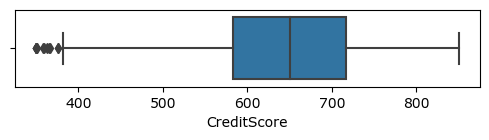

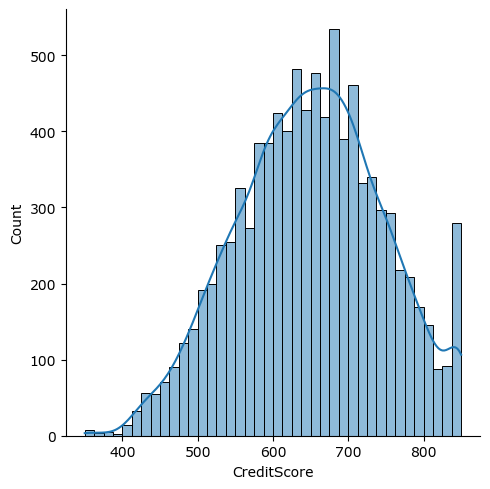

------------------------------





Finished! :D


In [10]:
## YOUR ANSWER HERE


numerical_features = datac[["CreditScore"]]

for c in numerical_features:
    print(f"🔵 Feature : {c}\n")
    
    # Central tendency measurement
    print("Central tendency measurement :")
    print(" * Mean: ", datac[c].mean())
    print(" * Median: ", datac[c].median())
    
    # Dispersion measurement
    print("\nDispersion measurement :")
    print(" * Variance: ", datac[c].var(ddof=0))
    print(" * Standard deviation: ", datac[c].std(ddof=0))
    
    if (datac[c].mean() * datac[c].std(ddof=0)) >= 0 and datac[c].std(ddof=0) >= datac[c].mean():
        print(f"🚨 Warning Standard deviation {datac[c].std(ddof=0) / datac[c].mean() * 100} times bigger than mean")
    
    # Shape measurement
    print("\nShape measurement :")
    print(" * Skewness: ", datac[c].skew())
    print(" * Kurtosis: ", datac[c].kurtosis())
    
    # P1 and P99
    Q1 = datac[c].quantile(0.25)
    Q3 = datac[c].quantile(0.75)
    print("\nP1 and P99 :")
    print(" * P1: ", datac[c].quantile(0.01))
    print(" * P5: ", datac[c].quantile(0.05))
    print(" * P25: ", Q1)
    print(" * P50: ", datac[c].quantile(0.50))
    print(" * P75: ", Q3)
    print(" * P95: ", datac[c].quantile(0.95))
    print(" * P99: ", datac[c].quantile(0.99))
    
    # Outlier test
    print("\nOutlier test :")
    IQR = Q3 - Q1
    
    high_outliers = datac[(datac[c] > Q3 + 1.5 * IQR)]
    low_outliers = datac[(datac[c] < Q1 - 1.5 * IQR)]
    
    if not high_outliers.empty or not low_outliers.empty:
        print("🚨 Warning Outliers detected:")
        if not high_outliers.empty:
            print(" * High outliers:")
            print(high_outliers)
        print()
        if not low_outliers.empty:
            print(" * Low outliers:")
            print(low_outliers)
    else:
        print("✅ No outliers detected.")
    
    # Box plot and distribution plot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=c, data=datac)
    plt.xlabel(c)
    plt.show()
    sns.displot(x=c, data=datac, kde=True)
    plt.show()
    
    print("------------------------------\n\n\n\n\n")

print("Finished! :D")

Based on the descriptive analysis of the feature "Credit Score", we can find the following conclusion :

	1.	Central Tendency: The average credit score is approximately 649.87, with a median score of 651. This indicates that the distribution is slightly left-skewed given the median is slightly greater than the mean.
    
	2.	Dispersion: With a variance of 9335.27, there’s a reasonable spread of credit scores in the dataset. This is further supported by a standard deviation of approximately 96.62, indicating that the majority of the scores lie within roughly 97 points above or below the mean.
    
	3.	Shape of the Distribution:
    - Skewness: The distribution is slightly negatively skewed with a skewness of -0.0713, but this value is close to zero, indicating a near-symmetrical distribution.
        We can although see a peak on the right tail, highlighting a group of high outliers.
    - Kurtosis: The kurtosis value of -0.424 indicates a slightly platykurtic distribution, meaning there are fewer extreme outliers than in a normal distribution.
    
	4.	Percentiles:
    - The 1st percentile (P1) and 99th percentile (P99) values are 431.33 and 850 respectively, highlighting the range within which 98% of the credit scores lie.
    - The 25th percentile (P25) is 583, meaning that 25% of the scores are below this value. The 75th percentile (P75) is 717, which means that 75% of the scores are below this value.
    - The interquartile range, which is the range between P25 and P75, is from 583 to 717, indicating the middle 50% of the scores.

### 5 - Geography analysis

Plot the distribution (in counts) of the `Geography` column.


🔵 Feature : Geography

{'France': 4681, 'Germany': 2338, 'Spain': 2315}


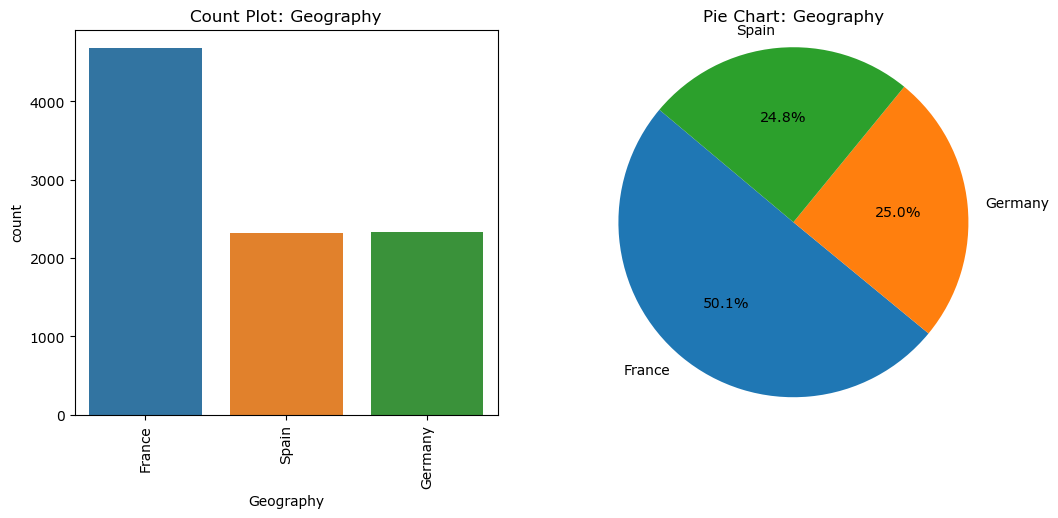


------------------------------





Finished! :D


<Figure size 640x480 with 0 Axes>

In [11]:
## YOUR ANSWER HERE

categorical_features = datac[["Geography"]]


# Create a list to store all plots
all_plots = []

for c in categorical_features:
    # Create a new figure for each category
    plt.figure(figsize=(12, 5))

    # Create a count plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=datac, x=c)
    plt.xticks(rotation=90)
    plt.title(f"Count Plot: {c}")

    # Create a pie chart
    plt.subplot(1, 2, 2)
    pie_data = datac[c].value_counts()
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f"Pie Chart: {c}")

    # Append the current plot to the list
    all_plots.append(plt.gcf())

    # Print value counts as a dictionary
    print(f"🔵 Feature : {c}\n")
    print(pie_data.to_dict())
    plt.show()
    print("\n------------------------------\n\n\n\n\n")

    

# Adjust spacing between subplots
plt.tight_layout()    
    

print("Finished! :D")

### 6 - Correlation analysis

Build a scatter plot matrix for each pair of these quantitative variables (`'Balance', 'CreditScore', 'EstimatedSalary'` => 3x3 matrix)

**Bonus: use the target variable (`Exited`) to color the dots.**

Write in a markdown cell your conclusion from these plots.


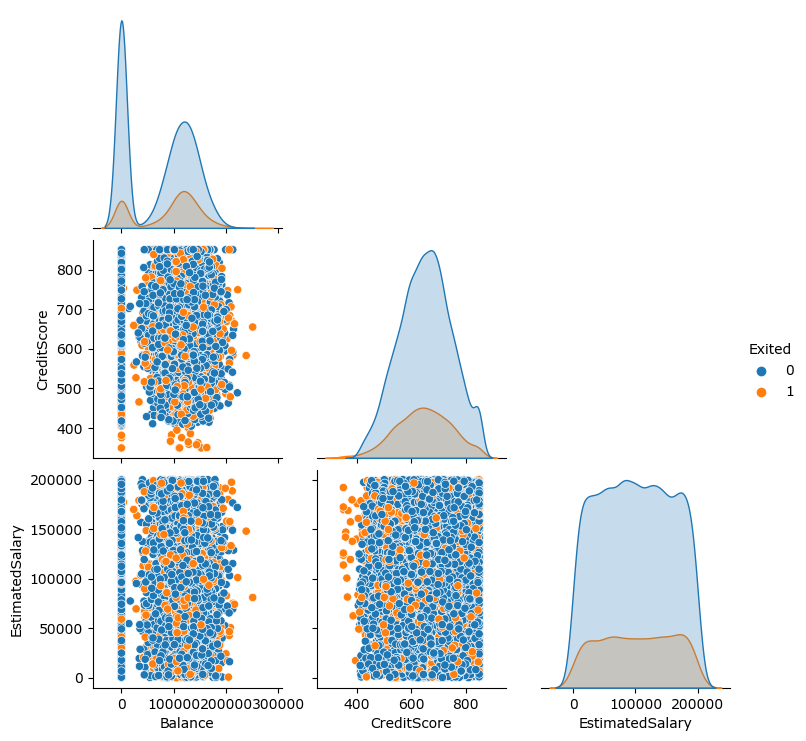

In [19]:
## YOUR ANSWER HERE

sns.pairplot(datac, hue='Exited', vars=['Balance', 'CreditScore', 'EstimatedSalary'], corner=True)
plt.show()

Conclusion:

    1. Balance vs CreditScore: 
    - We can see a line of values with zero balances, this may be due to incorrect input of balance values.
    - Most of the points are scattered around a balance of 5000 and 20 000
    - We can see a cluster of exited clients with a very low CreditScore
    - In conclusion we can see that there are no evident correlations between Balance and ClientScore as the data are evenly distributed. Exited clients are scattered all around the plot.
    
    2. Balance vs EstimatedSalary:
    - We can see a line of values with zero balances, this may be due to incorrect input of balance values.
    - Most of the points are scattered around a balance of 5000 and 20 000
    - In conclusion we can see that there are no evident correlations between Balance and EstimatedSalary as the data are evenly distributed. Exited clients are scattered all around the plot.
    
    
    3. EstimatedSalary vs CreditScore:
    - Points are mostly scattered around the range 400 and 800 CreditScore
    - We can find clusters of Exited clients with high EstimatedSalary and low CreditScore
    - We can observe a possible negative correlation between EstimatedSalary and CreditScore for the targetvalue Exited : meaning that the lower the CreditScore and the higher the EstimatedSalary, the most likely the client is to be Exited.

### 7 - Contingency tables

Analyze in details the correlations between `IsActiveMember` and `HasCrCard` columns by building a contingency table.

Propose a visual representation of this contingency table.


🔵 Features: IsActiveMember vs. HasCrCard



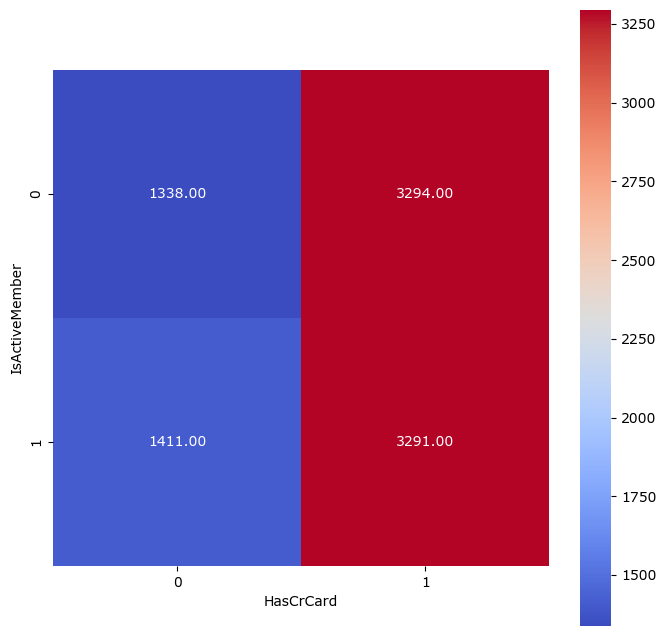

In [30]:
## YOUR ANSWER HERE

c1 = 'IsActiveMember'
c2 = 'HasCrCard'


print(f"🔵 Features: {c1} vs. {c2}\n")

# Create contingency table
contingency_table = pd.crosstab(datac[c1], datac[c2])

# Plot the contingency table
plt.figure(figsize=(8, 8))
sns.heatmap(contingency_table, cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.xlabel(c2)
plt.ylabel(c1)
plt.show()

### 8 - Test independence of variables

Perform a statistical independence test for these variables (`IsActiveMember` and `HasCrCard` columns).

Write your interpretation of the test results in a markdown cell.


In [31]:
## YOUR ANSWER HERE

print(f"🔵 Features: {c1} vs. {c2}\n")

# Create contingency table
contingency_table = pd.crosstab(datac[c1], datac[c2])
    
# Chi-Square Test of Independence
chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
print(" * Chi-Square Test of Independence:")
print("   - Chi-Square Value:", chi2)
print("   - p-value:", p_chi2)

🔵 Features: IsActiveMember vs. HasCrCard

 * Chi-Square Test of Independence:
   - Chi-Square Value: 1.3614981578608214
   - p-value: 0.24327800645144793


    1. The p-value (0.2433) is greater than the common significance level (0.05). Therefore, we fail to reject the null hypothesis.

    2. This means that we do not have sufficient evidence to say that IsActiveMember and HasCrCard are dependent.

### 9 - Normal distribution fit

Fit a Normal distribution on the `CreditScore` column.

Write your conclusion from this plot in a markdown cell.


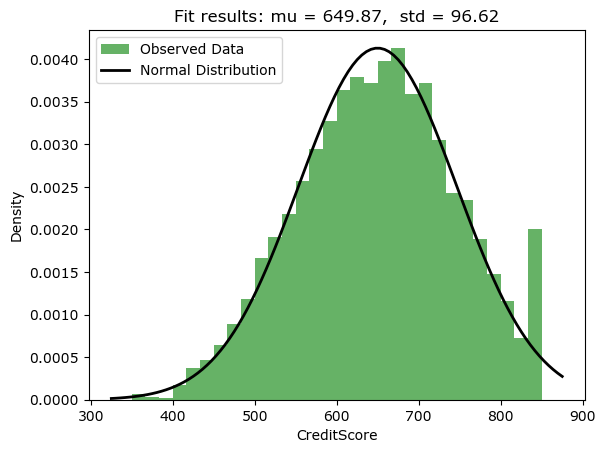

In [35]:
## YOUR ANSWER HERE

from scipy.stats import norm

# Plotting the histogram
plt.hist(datac['CreditScore'], bins=30, density=True, alpha=0.6, color='g', label='Observed Data')

# Fit a normal distribution
mu, std = norm.fit(datac['CreditScore'])

# Plotting the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('CreditScore')
plt.ylabel('Density')
plt.legend()

plt.show()

    1. We observe that the distribution of CreditScore closely follows the Normal distribution, with a deviation on the right tail because of the presence of outliers.

    2. Our fit results are close to the original CreditScore feature

